<a href="https://colab.research.google.com/github/dipanshawucr/Projects/blob/main/Basic_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Demo**

Coefficients: 
 [0.10976774]
intercepts: 
 98.24832962138078


Text(0, 0.5, 'size')

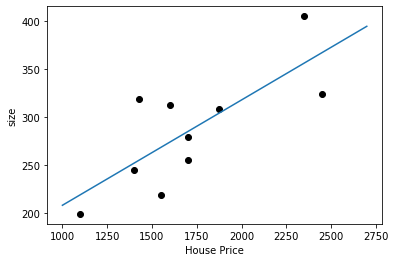

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

#Load the dataset
house_price=[245, 312, 279, 308, 199, 219, 405, 324, 319, 255]
size=[1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]

size2=np.array(size).reshape((-1,1))


regr=linear_model.LinearRegression()
regr.fit(size2, house_price)

print("Coefficients: \n", regr.coef_)
print("intercepts: \n", regr.intercept_)

regr.predict([[1400]]) #size*regr.coef_ + regr.intercept_

def graph(formula, x_range):
  x=np.array(x_range)
  y=eval(formula)
  plt.plot(x,y)

graph('regr.coef_*x + regr.intercept_', range(1000,2700))
plt.scatter(size, house_price, color='black')
plt.xlabel('House Price')
plt.ylabel('size')



# **K-means Clustering Demo**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

X=np.array([[1,2], [5,8], [1.5, 1.8], [8,8],[1,0.6], [9,11]])

kmeans = KMeans(n_clusters=2)
kmeans.fit((X))

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]
[0 1 0 1 0 1]


# **How to generate and sample random numbers**

In [ ]:
import random
print(random.random()) #between 0<=x<1
print(random.randint(0,10)) #between 0<=x<10
randlist=[random.randint(0,10) for _ in range(10)]
print(randlist) #[9, 10, 4, 6, 7, 0, 0, 0, 9, 4]
random.shuffle(randlist)
print(randlist) #[10, 6, 4, 9, 0, 9, 4, 0, 7, 0]
print(random.sample(range(0,100), k =4)) #[36, 87, 76, 16]


0.6854134877906664
5
[2, 6, 4, 7, 8, 8, 5, 6, 4, 2]
[2, 6, 8, 5, 2, 6, 8, 4, 4, 7]
[53, 14, 98, 89]


# **K-means clustering without Library**

In [ ]:
import numpy
import random

X=[[random.random() for _ in range(3)] for _ in range(100)]

print(X)

k=3
clusters={}
for i in range(k):
  clusters[i]=[]

centroids=[0]*k
for i in range(k):
  centroids[i]=X[random.randint(0,100)]
print(centroids)



[[0.7556078702824106, 0.3618375213264775, 0.8808017582801682], [0.03535596519955986, 0.6311515343831936, 0.9294373202677871], [0.5723548183571032, 0.4775953679310587, 0.7630672263974986], [0.3560681945498362, 0.7187701139347616, 0.9963085316019371], [0.93512894088334, 0.5121093159997405, 0.646239817353265], [0.01160786188222751, 0.5619719783391381, 0.8222610947671735], [0.24782997805630536, 0.43261261153195607, 0.6020111884198319], [0.2800478783555097, 0.49953824906344435, 0.16603630881706055], [0.3961777700322313, 0.3093141114682628, 0.8823263897366953], [0.0348137317064281, 0.6112950803663809, 0.4539544455560195], [0.7819519454441212, 0.7625354370255448, 0.8434570628729703], [0.4636093474658396, 0.26228767592049973, 0.47766230218701466], [0.2468049638955634, 0.9808821946997254, 0.537835847666512], [0.02561078693551011, 0.4771949964658163, 0.3150783031657788], [0.1646089503034437, 0.7058721407609662, 0.5149770416250522], [0.5362370755973099, 0.9089482089676555, 0.1125075319701323], [0

In [ ]:
def recalculate_clusters(X, centroids, k):
  clusters={}
  for i in range(k): clusters[i]=[]
  for data in X:
    euc_dist=[]

    for j in range(k):
      euc_dist.append(numpy.linalg.norm(numpy.array(data) - numpy.array(centroids[j])))  # for each data calculate the euclididan distance from each cluster

    clusters[euc_dist.index(min(euc_dist))].append(data)    # Insert the data to that cluster that have min euclidian distance  
  return clusters

def recalculate_centroids(centroids, clusters, k):
  for i in range(k):
    centroids[i]=numpy.average(clusters[i], axis=0)
  
  return centroids


In [ ]:

prev_centroids=centroids
print(centroids)
while True:
#for i in range(10):
  clusters=recalculate_clusters(X, centroids, k)
  centroids=recalculate_centroids(centroids, clusters, k)
  print(centroids)
  for key, val in clusters.items():
    print(len(val))
  if numpy.linalg.norm(numpy.array(prev_centroids)-numpy.array(centroids))<0.000000000000000000000000000001:
    break
  


[array([0.35510934, 0.62035849, 0.77478366]), array([0.45936376, 0.67740491, 0.22849448]), array([0.61058772, 0.17812328, 0.49945097])]
[array([0.35510934, 0.62035849, 0.77478366]), array([0.45936376, 0.67740491, 0.22849448]), array([0.61058772, 0.17812328, 0.49945097])]
39
28
33


# **KNN without library**

In [ ]:
from pandas import read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Use matplotlib in Jupyter Notebook Outputs
%matplotlib inline

from sklearn.model_selection import train_test_split


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
datasets=pd.read_csv(url, names=names)

array=datasets.values
X=array[:,0:4]
y=array[:,4]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


[]

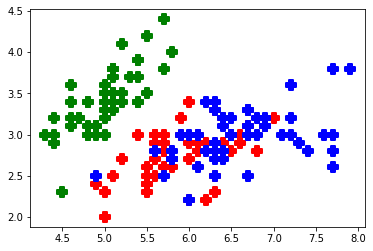

In [ ]:
for i in range(len(X)):
    if y[i] == 'Iris-setosa':
        plt.scatter(X[i][0], X[i][1], s=120, marker='P', linewidths=2, color='green')
    elif y[i]=='Iris-versicolor':
        plt.scatter(X[i][0], X[i][1], s=120, marker='P', linewidths=2, color='red')
    else:
        plt.scatter(X[i][0], X[i][1], s=120, marker='P', linewidths=2, color='blue')

plt.plot()

In [ ]:
def distance(X1, X2):
  return np.linalg.norm(np.array(X1)-np.array(X2))

def predict(X_train, Y_train, testsample, k):
  dist=[]
  for index, data in enumerate(X_train):
    curdist=distance(data, testsample)
    curlabel=Y_train[index]
    dist.append([curdist, curlabel])
    
  dist.sort()
  dist=dist[0:k]

  votemap={}
  for d in dist:
    if d[1] in votemap:
      votemap[d[1]]+=1
    else:
      votemap[d[1]]=1
  
  key=list(votemap.keys())
  val=list(votemap.values())
  return key[val.index(max(val))]   #key of maximum voted value  


correct=0
incorrect=0
total=len(X_validation)
for index, test in enumerate(X_validation):
  if predict(X_train, Y_train, test, k=200)==Y_validation[index]:
    correct+=1
  else:
    incorrect+=1

print(correct, incorrect, total)





6 24 30


# **Decision tree implementation using Python without library**

In [ ]:
from pandas import read_csv
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import math

In [ ]:
def entropy_func(c, n):
    """
    The math formula
    """
    return -(c*1.0/n)*math.log(c*1.0/n, 2)

def entropy_cal(c1, c2):
    """
    Returns entropy of a group of data
    c1: count of one class
    c2: count of another class
    """
    if c1== 0 or c2 == 0:  # when there is only one class in the group, entropy is 0
        return 0
    return entropy_func(c1, c1+c2) + entropy_func(c2, c1+c2)

# get the entropy of one big circle showing above
def entropy_of_one_division(division): 
    """
    Returns entropy of a divided group of data
    Data may have multiple classes
    """
    s = 0
    n = len(division)
    classes = set(division)
    for c in classes:   # for each class, get entropy
        n_c = sum(division==c)
        e = n_c*1.0/n * entropy_cal(sum(division==c), sum(division!=c)) # weighted avg
        s += e
    return s, n

# The whole entropy of two big circles combined
def get_entropy(y_predict, y_real):
    """
    Returns entropy of a split
    y_predict is the split decision, True/Fasle, and y_true can be multi class
    """
    if len(y_predict) != len(y_real):
        print('They have to be the same length')
        return None
    n = len(y_real)
    s_true, n_true = entropy_of_one_division(y_real[y_predict]) # left hand side entropy
    s_false, n_false = entropy_of_one_division(y_real[~y_predict]) # right hand side entropy
    s = n_true*1.0/n * s_true + n_false*1.0/n * s_false # overall entropy, again weighted average
    return s

In [ ]:
class DecisionTreeClassifierNew(object):
    def __init__(self, max_depth):
        self.depth = 0
        self.max_depth = max_depth
    
    def fit(self, x, y, par_node={}, depth=0):
        if par_node is None: 
            return None
        elif len(y) == 0:
            return None
        elif self.all_same(y):
            return {'val':y[0]}
        elif depth >= self.max_depth:
            return None
        else: 
            col, cutoff, entropy = self.find_best_split_of_all(x, y)    # find one split given an information gain 
            y_left = y[x[:, col] < cutoff]
            y_right = y[x[:, col] >= cutoff]
            par_node = {'col': iris.feature_names[col], 'index_col':col,
                        'cutoff':cutoff,
                       'val': np.round(np.mean(y))}
            par_node['left'] = self.fit(x[x[:, col] < cutoff], y_left, {}, depth+1)
            par_node['right'] = self.fit(x[x[:, col] >= cutoff], y_right, {}, depth+1)
            self.depth += 1 
            self.trees = par_node
            return par_node
    
    def find_best_split_of_all(self, x, y):
        col = None
        min_entropy = 1
        cutoff = None
        for i, c in enumerate(x.T):
            entropy, cur_cutoff = self.find_best_split(c, y)
            if entropy == 0:    # find the first perfect cutoff. Stop Iterating
                return i, cur_cutoff, entropy
            elif entropy <= min_entropy:
                min_entropy = entropy
                col = i
                cutoff = cur_cutoff
        return col, cutoff, min_entropy
    
    def find_best_split(self, col, y):
        min_entropy = 10
        n = len(y)
        for value in set(col):
            y_predict = col < value
            my_entropy = get_entropy(y_predict, y)
            if my_entropy <= min_entropy:
                min_entropy = my_entropy
                cutoff = value
        return min_entropy, cutoff
    
    def all_same(self, items):
        return all(x == items[0] for x in items)
                                           
    def predict(self, x):
        tree = self.trees
        results = np.array([0]*len(x))
        for i, c in enumerate(x):
            results[i] = self._get_prediction(c)
        return results
    
    def _get_prediction(self, row):
        cur_layer = self.trees
        while cur_layer.get('cutoff'):
            if row[cur_layer['index_col']] < cur_layer['cutoff']:
                cur_layer = cur_layer['left']
            else:
                cur_layer = cur_layer['right']
        else:
            return cur_layer.get('val')

In [ ]:
from sklearn.datasets import load_iris
from pprint import pprint

iris = load_iris()

x = iris.data
y = iris.target

clf = DecisionTreeClassifierNew(max_depth=100)
m = clf.fit(x, y)

pprint(m)

{'col': 'petal width (cm)',
 'cutoff': 1.0,
 'index_col': 3,
 'left': {'val': 0},
 'right': {'col': 'petal width (cm)',
           'cutoff': 1.8,
           'index_col': 3,
           'left': {'col': 'petal length (cm)',
                    'cutoff': 5.0,
                    'index_col': 2,
                    'left': {'col': 'petal width (cm)',
                             'cutoff': 1.7,
                             'index_col': 3,
                             'left': {'val': 1},
                             'right': {'val': 2},
                             'val': 1.0},
                    'right': {'col': 'petal width (cm)',
                              'cutoff': 1.6,
                              'index_col': 3,
                              'left': {'val': 2},
                              'right': {'col': 'sepal length (cm)',
                                        'cutoff': 7.2,
                                        'index_col': 0,
                                        'left

# **All basic algorithms of Machine learing usign Iris data and sklearn libray**
---



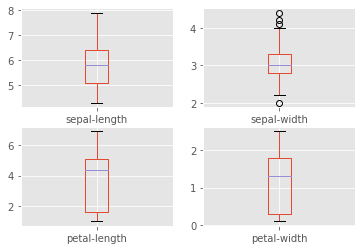

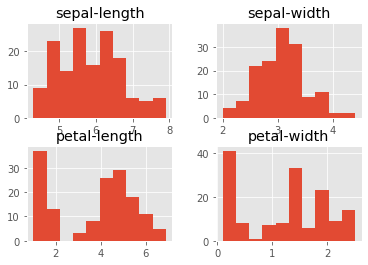

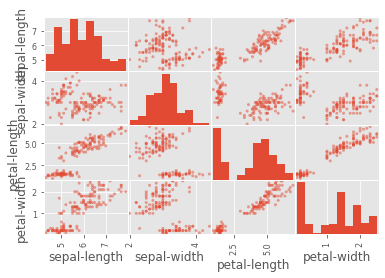

In [ ]:
#Load Libraries
from pandas import read_csv
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
datasets=pd.read_csv(url, names=names)

# shape
#print(datasets.shape)
# head
#print(datasets.head(20))
# descriptions
#print(datasets.describe())
# class distribution
#print(datasets.groupby('class').size())

datasets.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

datasets.hist()
plt.show()

scatter_matrix(datasets)
plt.show()

In [ ]:
array=datasets.values
X=array[:,0:4]
y=array[:,4]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.040825)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


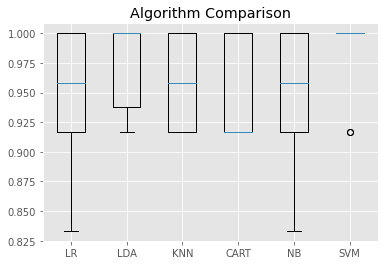

In [ ]:
...
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:

# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# **Deep Neural Network**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import pandas as pd

from google.colab import files

file=files.upload()

X_train=pd.read_csv("xtrain.csv", header=None)
Y_train=pd.read_csv("ytrain.csv", header=None)
X_test=pd.read_csv("xtest.csv", header=None)
Y_test=pd.read_csv("ytest.csv", header=None)





Saving xtest.csv to xtest.csv
Saving xtrain.csv to xtrain.csv
Saving ytest.csv to ytest.csv
Saving ytrain.csv to ytrain.csv


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units=16, activation='relu', input_dim=30))
classifier.add(Dense(units=8, activation='relu'))
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy')
classifier.fit(X_train, Y_train, batch_size=1, epochs=100)

Epoch 1/100
455/455 [==============================] - 0s 913us/step - loss: 0.3104
Epoch 2/100
455/455 [==============================] - 0s 905us/step - loss: 0.1169
Epoch 3/100
455/455 [==============================] - 0s 913us/step - loss: 0.0923
Epoch 4/100
455/455 [==============================] - 0s 963us/step - loss: 0.0957
Epoch 5/100
455/455 [==============================] - 0s 916us/step - loss: 0.0913
Epoch 6/100
455/455 [==============================] - 0s 911us/step - loss: 0.0988
Epoch 7/100
455/455 [==============================] - 0s 914us/step - loss: 0.0979
Epoch 8/100
455/455 [==============================] - 0s 918us/step - loss: 0.1015
Epoch 9/100
455/455 [==============================] - 0s 914us/step - loss: 0.0935
Epoch 10/100
455/455 [==============================] - 0s 925us/step - loss: 0.0904
Epoch 11/100
455/455 [==============================] - 0s 977us/step - loss: 0.0980
Epoch 12/100
455/455 [==============================] - 0s 946us/step - lo

In [ ]:
Y_pred=classifier.predict(X_test)
Y_pred=[1 if y>=0.5 else 0 for y in Y_pred]

In [ ]:
total=0
correct=0
wrong=0

for i in range(len(Y_pred)):
  total=total+1
  if(Y_test.iloc[i,0] == Y_pred[i]):
    correct+=1
  else:
    wrong+=1

print(total, correct, wrong)

114 111 3


In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

# **Natural Language Processing**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


sentences = [
             'I love my dog',
             'I love my cat',
             'You love my dog!', #remove the puntuation marks
             'Do you think my dog is amazing?'
]

test_data = ['i really love my dog',
             'my dog loves my manatee'
]


tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>") #oov - out of vocabulary #maintain sequence of differnt length
tokenizer.fit_on_texts(sentences)  # give a number to a word by tokenizing all words from all sentences, which will be stored in word_index
word_index = tokenizer.word_index  # 

sequences = tokenizer.texts_to_sequences(sentences)   # convert each sentence as sequence
padded=pad_sequences(sequences, padding='post', truncating='post', maxlen=5) # convert the sequences to padded sequence

test_seqs=tokenizer.texts_to_sequences(test_data) 

print(word_index)
print(sequences)
print(padded)
print(test_seqs)


{'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]
[[5 3 2 4 0]
 [5 3 2 7 0]
 [6 3 2 4 0]
 [8 6 9 2 4]]
[[5, 1, 3, 2, 4], [2, 4, 1, 2, 1]]


In [ ]:
import json

#from google.colab import files
#file=files.upload()

datastore=[]
for line in open('Sarcasm_Headlines_Dataset_v2.json', 'r'):
    datastore.append(json.loads(line))
print(datastore)
#datastore = json.load(f)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import json

#from google.colab import files
#file=files.upload()

datastore=[]
for line in open('Sarcasm_Headlines_Dataset.json', 'r'):
    datastore.append(json.loads(line))

  #datastore = json.load(f)

sentences = []
labels = []
urls = []



for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])


print(len(sentences))


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)




26709
29657
[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-10-16 11:49:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2020-10-16 11:49:09 (128 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
datastore=[]
#for line in open('Sarcasm_Headlines_Dataset.json', 'r'):
#    datastore.append(json.loads(line))
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

print(len(sentences))

26709


In [ ]:

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

print(len(training_sentences))

20000


In [ ]:

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sentences = tokenizer.texts_to_sequences(training_sentences)
#training_padded = pad_sequences(training_sentences, padding='post')
training_padded = pad_sequences(training_sentences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
#testing_padded = pad_sequences(testing_sentences, padding='post')
testing_padded = pad_sequences(testing_sentences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
print(len(training_padded[0]), len(testing_padded[0]))

100 100


In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

print(training_padded.shape, training_labels.shape, testing_padded.shape, testing_labels.shape)

(20000, 100) (20000,) (6709, 100) (6709,)


In [ ]:

model = tf.keras.Sequential([
        
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

model = tf.keras.Sequential([
        
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

model = tf.keras.Sequential([
        
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequence=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense_14 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 204,593
Trainable params: 204,593
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
print(training_padded.shape, training_labels.shape, testing_padded.shape, testing_labels.shape)
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)


(20000, 100) (20000,) (6709, 100) (6709,)
Epoch 1/30
625/625 - 32s - loss: 0.4179 - accuracy: 0.7897 - val_loss: 0.3376 - val_accuracy: 0.8489
Epoch 2/30
625/625 - 32s - loss: 0.2202 - accuracy: 0.9087 - val_loss: 0.3396 - val_accuracy: 0.8563
Epoch 3/30
625/625 - 32s - loss: 0.1434 - accuracy: 0.9454 - val_loss: 0.3891 - val_accuracy: 0.8521
Epoch 4/30
625/625 - 31s - loss: 0.0868 - accuracy: 0.9688 - val_loss: 0.4828 - val_accuracy: 0.8487
Epoch 5/30
625/625 - 32s - loss: 0.0507 - accuracy: 0.9843 - val_loss: 0.5945 - val_accuracy: 0.8395
Epoch 6/30
625/625 - 32s - loss: 0.0339 - accuracy: 0.9887 - val_loss: 0.6616 - val_accuracy: 0.8398
Epoch 7/30
625/625 - 32s - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.7721 - val_accuracy: 0.8389
Epoch 8/30
625/625 - 32s - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.8626 - val_accuracy: 0.8329
Epoch 9/30
625/625 - 32s - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.9203 - val_accuracy: 0.8363
Epoch 10/30


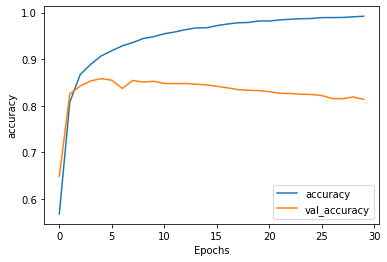

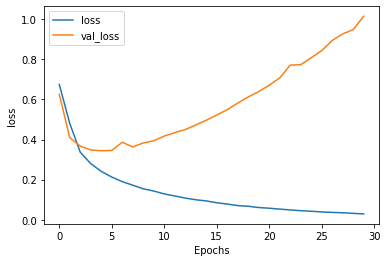

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
[153, 890, 2, 891, 1445, 2215, 595, 5650, 221, 133, 36, 45, 2, 8864]
1


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.0199912e-01]
 [1.1915787e-05]]
